# About this Dataset

## Data overview
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

## Key Features of the Dataset:
- *Comprehensive Sleep Metrics*: Explore sleep duration, quality, and factors influencing sleep patterns.
- *Lifestyle Factors*: Analyze physical activity levels, stress levels, and BMI categories.
- *Cardiovascular Health*: Examine blood pressure and heart rate measurements.
- *Sleep Disorder Analysis*: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.



## Dataset Columns:

| **Field**                           |        Description                                                                |
|-------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **Person   ID**                                |  An identifier for each individual.
| **Gender**                                |  The gender of the person   (Male/Female).                                                               |
| **Age**                                   |  The age of the person in years.                                                                         |
| **Occupation**                            |  The occupation or profession of   the person.                                                           |
| **Sleep Duration (hours)**                |  The number of hours the person   sleeps per day.                                                        |
| **Quality of Sleep (scale  1-10)**        |  A subjective rating of the quality   of sleep, ranging from 1 to 10.                                    |
| **Physical Activity Level (minutes/day)** |  The number of minutes the person   engages in physical activity daily.                                  |
| **Stress Level (scale  1-10)**            |  A subjective rating of the stress   level experienced by the person, ranging from 1 to 10.              |
| **BMI Category**                          |  The BMI category of the person   (e.g., Underweight, Normal, Overweight).                               |
| **Blood Pressure (systolic/diastolic)**   |  The blood pressure measurement of   the person, indicated as systolic pressure over diastolic pressure. |
| **Heart Rate (bpm)**                      |  The resting heart rate of the   person in beats per minute.                                             |
| **Daily Steps**                           |  The number of steps the person   takes per day.                                                         |
| **Sleep Disorder**                        |  The presence or absence of a sleep   disorder in the person (None, Insomnia, Sleep Apnea).              |


**Details about Sleep Disorder Column:**

None: The individual does not exhibit any specific sleep disorder.
Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

In [1]:
!pip install opendatasets

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import opendatasets as od

In [5]:
#Copy credencials of kaggle to correct place
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ./
!chmod 600 ~/.kaggle/kaggle.json
print("ok")

ok


In [6]:
# create folder of kaggle with url of dataset
od.download(
    "https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset")

100%|██████████| 2.54k/2.54k [00:00<00:00, 772kB/s]

## Project Description

Sleep is essential for both physical and mental health. Quality sleep repairs cells, consolidates memories, wards off disease, and much more. In this project, I will be working as a data science consultant for SleepInc, a sleep-tracking startup, and your **mission is to analyze anonymous sleep data** from their SleepScope app to *uncover insights into lifestyle factors affecting sleep quality and duration*.

# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import and read data

In [8]:
# import and view data
raw_data=pd.read_csv('/content/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
raw_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Information of data type of dataset

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Exploratory Data Analysis

Check missing

In [10]:
# check missing info
raw_data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [11]:
raw_data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [15]:
# Replace NaN to No Disorder
raw_data['Sleep Disorder'] = raw_data['Sleep Disorder'].fillna('No Disorder')
raw_data[raw_data['Sleep Disorder']=='No Disorder'].shape

(219, 13)


219 records and 13 features



In [16]:
#validate no missing info
raw_data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


5 features categorical and the others numeric

## Columns containing nominal categorical data unique values

 (stored as the category data type)


In [18]:
object_variables = [col for col in raw_data.columns if raw_data[col].dtype == 'O']
print(object_variables)

# list of features nominal
print(raw_data[object_variables].dtypes) # validate type of features

# raw_data[object_variables] = raw_data[object_variables].astype(dtype='category')
# print(raw_data[object_variables].dtypes) # validate type of features

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
Gender            object
Occupation        object
BMI Category      object
Blood Pressure    object
Sleep Disorder    object
dtype: object


In [19]:
# unique values at each column categorical
col=object_variables
for col in raw_data:
    print(f'{col.upper()}'.center(50, '*'))
    print(f'{col}: {raw_data[col].unique()}', '\n')

********************PERSON ID*********************
Person ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 2

In [24]:
# Iterate over each column
for col in raw_data.columns:
    # Check if the column is categorical
    # if pd.api.types.is_categorical_dtype(raw_data[column]):
    if raw_data[col].dtype == object:  # Checking if the column is of object type
        # Get value counts and print
        unique_values = raw_data[col].nunique()
        print(f"Unique values for '{col}': {unique_values}")
        print("Value counts for column '{}'".format(col))
        print(raw_data[col].value_counts())
        print()

Unique values for 'Gender': 2
Value counts for column 'Gender'
Gender
Male      189
Female    185
Name: count, dtype: int64

Unique values for 'Occupation': 11
Value counts for column 'Occupation'
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Unique values for 'BMI Category': 4
Value counts for column 'BMI Category'
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Unique values for 'Blood Pressure': 25
Value counts for column 'Blood Pressure'
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/9

In [25]:
# replace normal weight to normal
raw_data["BMI Category"] = raw_data["BMI Category"].replace("Normal Weight", "Normal")

raw_data["Occupation"] = raw_data["Occupation"].replace("Sales Representative", "Salesperson")

In [26]:
raw_data['BMI Category'].value_counts(), raw_data['Occupation'].value_counts()



(BMI Category
 Normal        216
 Overweight    148
 Obese          10
 Name: count, dtype: int64,
 Occupation
 Nurse                73
 Doctor               71
 Engineer             63
 Lawyer               47
 Teacher              40
 Accountant           37
 Salesperson          34
 Software Engineer     4
 Scientist             4
 Manager               1
 Name: count, dtype: int64)

In [71]:
# Check for duplicate rows
duplicate_rows = raw_data[raw_data.duplicated()]
duplicate_rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


In [72]:
# Check for duplicates in the subset of columns ['Person ID', 'Gender']
duplicate_subset = raw_data[raw_data.duplicated(subset=['Person ID', 'Gender'], keep=False)]
duplicate_subset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


doesn't exist duplicate records

## Summarize the Data

Check outliers and basic stat of numeric fields

In [73]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


## 1. Which occupation has the lowest average sleep duration? Save this in a string variable called `lowest_sleep_occ`.

In [75]:
# Groupby occupation and calculate mean sleep duration
sleep_duration = raw_data.groupby('Occupation')['Sleep Duration'].mean()
sleep_duration


Occupation
Accountant           7.113514
Doctor               6.970423
Engineer             7.987302
Lawyer               7.410638
Manager              6.900000
Nurse                7.063014
Salesperson          6.373529
Scientist            6.000000
Software Engineer    6.750000
Teacher              6.690000
Name: Sleep Duration, dtype: float64

In [76]:
# Get occupation with lowest average sleep duration
lowest_sleep_occ = sleep_duration.sort_values().index[0] # sort ascending and get the first row
lowest_sleep_occ

'Scientist'

Occupation 'Scientist' is the one with less duration sleep

## 2. Which occupation had the lowest quality of on average? Did the occupation with the lowest sleep duration also have the worst sleep quality?

In [77]:

# Groupby occupation and calculate average sleep quality
sleep_quality = raw_data.groupby('Occupation')['Quality of Sleep'].mean()

# Get occupation with lowest average sleep quality
lowest_sleep_quality_occ = sleep_quality.sort_values().index[0]  # sort ascending and get the first row
lowest_sleep_quality_occ

'Scientist'

Occupation 'Scientist' is the one with lowest quality sleep

## Compare occupation with the least sleep to occupation with the lowest sleep quality

In [32]:
if lowest_sleep_occ == lowest_sleep_quality_occ:
  same_occ = True
else:
  same_occ = False

same_occ

True

# 3. Let's explore how BMI Category can affect sleep disorder rates. Start by finding what ratio of app users in each BMI category have been diagnosed with Insomnia.

- Filter all records with insomnia and BMI as normal, over and obese
- Calc the racio for normal, over and obese


In [79]:
raw_data["BMI Category"].unique(), raw_data["Sleep Disorder"].unique()

(array(['Overweight', 'Normal', 'Obese'], dtype=object),
 array(['No Disorder', 'Sleep Apnea', 'Insomnia'], dtype=object))

In [80]:

# Normal
# Filter the full dataframe to only rows where BMI Category is Normal and Sleep Disorder is Insomnia.
normal = raw_data[(raw_data["BMI Category"] == "Normal") &
                  (raw_data["Sleep Disorder"] == "Insomnia")]

# Total normal rows
total_normal = len(raw_data[raw_data["BMI Category"] == "Normal"])
# Calculate normal insomnia ratio
normal_insomnia_ratio = round(len(normal) / total_normal, 2)

len(normal),total_normal, normal_insomnia_ratio

(9, 216, 0.04)

In [81]:
# Overweight
# Filter the full dataframe to only rows where BMI Category is Overweight and Sleep Disorder is Insomnia.
overweight = raw_data[(raw_data["BMI Category"] == "Overweight") &
                      (raw_data["Sleep Disorder"] == "Insomnia")]
# Total overweight rows
total_overweight = len(raw_data[raw_data["BMI Category"] == "Overweight"])

# Calculate overweight insomnia ratio
overweight_insomnia_ratio = round(len(overweight) / total_overweight, 2)
len(overweight),total_overweight , overweight_insomnia_ratio

(64, 148, 0.43)

In [44]:
# Obese
# Filter the full dataframe to only rows where BMI Category is Obese and Sleep Disorder is Insomnia.
obese = raw_data[(raw_data["BMI Category"] == "Obese") &
                  (raw_data["Sleep Disorder"] == "Insomnia")]

# Total obese rows
total_obese = len(raw_data[raw_data["BMI Category"] == "Obese"])

# Calculate obese insomnia ratio
obese_insomnia_ratio = round(len(obese) / total_obese, 2)
len(obese), total_obese, obese_insomnia_ratio

(4, 10, 0.4)

In [37]:
normal_insomnia_ratio+overweight_insomnia_ratio+obese_insomnia_ratio

0.87

## Create dictionary to store the ratios for each BMI category

In [39]:

bmi_insomnia_ratios = {
    "Normal": normal_insomnia_ratio,
    "Overweight": overweight_insomnia_ratio,
    "Obese": obese_insomnia_ratio
}

bmi_insomnia_ratios

{'Normal': 0.04, 'Overweight': 0.43, 'Obese': 0.4}

# **Pivot table** for BMI and sleep disorder

In [56]:
pivot_df_count= raw_data.pivot_table(index='BMI Category', columns='Sleep Disorder', fill_value=0, aggfunc='size')

print(pivot_df_count)

Sleep Disorder  Insomnia  No Disorder  Sleep Apnea
BMI Category                                      
Normal                 9          200            7
Obese                  4            0            6
Overweight            64           19           65


**Filter values in Pivot table**

In [64]:
#filter the first column

# Filter value at the normal and insomnia
value_at_normal_insomnia  = pivot_df_count.iloc[0, 0]

# Filter value at the obese and insomnia
value_at_obese_insomnia = pivot_df_count.iloc[1, 0]

# Filter value at the overweight and insomnia
value_at_overweight_insomnia = pivot_df_count.iloc[2, 0]

####sum of value in rows

# Filter value at normal
sum_value_normal = pivot_df_count.iloc[0].sum()

# Filter value at obese
sum_value_obese = pivot_df_count.iloc[1].sum()

# Filter value at Overweight
sum_value_Overweight = pivot_df_count.iloc[2].sum()


value_at_normal_insomnia,value_at_obese_insomnia,value_at_overweight_insomnia, sum_value_normal ,sum_value_obese, sum_value_Overweight




(9, 4, 64, 216, 10, 148)

In [69]:
normal=round(value_at_normal_insomnia/sum_value_normal, 2)
obese=round(value_at_obese_insomnia/sum_value_obese, 2)
overweight=round(value_at_overweight_insomnia/sum_value_Overweight, 2)

normal, obese, overweight

(0.04, 0.4, 0.43)

**Filter** the pivot table to include only rows where the number of value at **column 'no disorder' is greater than 1**

In [58]:

filtered_pivot = pivot_df_count[pivot_df_count['No Disorder'] > 1]

print(filtered_pivot)

Sleep Disorder  Insomnia  No Disorder  Sleep Apnea
BMI Category                                      
Normal                 9          200            7
Overweight            64           19           65


**Get the values at pivot as percentage**

In [84]:
# Calculate total count of records
total_records = len(raw_data)

# Calculate the percentage of records for each cell
pivot_df_percentage = pivot_df_count / total_records * 100
round(pivot_df_percentage, 2)

Sleep Disorder,Insomnia,No Disorder,Sleep Apnea
BMI Category,,,
Normal,2.41,53.48,1.87
Obese,1.07,0.00,1.60
Overweight,17.11,5.08,17.38


# **Pivot table** for BMI and sleep disorder, and **values mean Sleep duration**

In [83]:
# pivot table for BMI and Sleep Disorder
# Creating a pivot table with 'BMI' and 'Sleep Disorder' as rows and 'Value' as values
pivot_BMI_Sleep_disorder = raw_data.pivot_table(index='BMI Category', columns='Sleep Disorder', values='Sleep Duration', aggfunc='mean', margins=True, margins_name='Total')

print(round(pivot_BMI_Sleep_disorder, 2))



Sleep Disorder  Insomnia  No Disorder  Sleep Apnea  Total
BMI Category                                             
Normal              7.20         7.41         6.96   7.39
Obese               6.70          NaN         7.13   6.96
Overweight          6.50         6.80         7.03   6.77
Total               6.59         7.36         7.03   7.13


# Visualization

In [85]:
raw_data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [86]:
occupation_stress_df = raw_data[['Occupation', 'Stress Level','Gender']].copy()

In [89]:
mean_stress_by_occupation_gender = occupation_stress_df.groupby(['Occupation', 'Gender'])['Stress Level'].mean().reset_index()
mean_stress_by_occupation_gender

,Occupation,Gender,Stress Level
0,Accountant,Female,4.555556
1,Accountant,Male,6.000000
2,Doctor,Female,3.000000
3,Doctor,Male,6.840580
4,Engineer,Female,3.000000
5,Engineer,Male,4.806452
6,Lawyer,Female,5.500000
7,Lawyer,Male,5.044444
8,Manager,Female,5.000000
9,Nurse,Female,5.547945


In [94]:
gender_stress_df = raw_data.groupby(['Gender'])['Stress Level'].mean().reset_index()
gender_duration_df = raw_data.groupby(['Gender'])['Sleep Duration'].mean().reset_index()

gender_stress_df, gender_duration_df

(   Gender  Stress Level
 0  Female      4.675676
 1    Male      6.079365,
    Gender  Sleep Duration
 0  Female        7.229730
 1    Male        7.036508)

In [95]:
occupation_stress_df = raw_data.groupby(['Occupation'])['Stress Level'].mean().reset_index()
occupation_duration_df = raw_data.groupby(['Occupation'])['Sleep Duration'].mean().reset_index()
occupation_stress_df, occupation_duration_df


(          Occupation  Stress Level
 0         Accountant      4.594595
 1             Doctor      6.732394
 2           Engineer      3.888889
 3             Lawyer      5.063830
 4            Manager      5.000000
 5              Nurse      5.547945
 6        Salesperson      7.058824
 7          Scientist      7.000000
 8  Software Engineer      6.000000
 9            Teacher      4.525000,
           Occupation  Sleep Duration
 0         Accountant        7.113514
 1             Doctor        6.970423
 2           Engineer        7.987302
 3             Lawyer        7.410638
 4            Manager        6.900000
 5              Nurse        7.063014
 6        Salesperson        6.373529
 7          Scientist        6.000000
 8  Software Engineer        6.750000
 9            Teacher        6.690000)

Distribution of BMI categories and Sleep Disorder

In [96]:
bmi_counts = raw_data['BMI Category'].value_counts()
sleep_disorder_counts = raw_data['Sleep Disorder'].value_counts()
bmi_counts, sleep_disorder_counts

(BMI Category
 Normal        216
 Overweight    148
 Obese          10
 Name: count, dtype: int64,
 Sleep Disorder
 No Disorder    219
 Sleep Apnea     78
 Insomnia        77
 Name: count, dtype: int64)

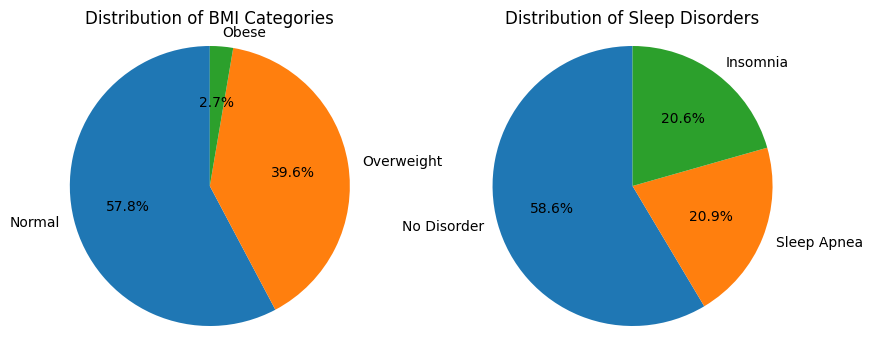

In [109]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot first pie chart
axs[0].pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution of BMI Categories')

# Plot second pie chart
axs[1].pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution of Sleep Disorders')

# Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].axis('equal')
axs[1].axis('equal')

plt.show()



so seems that BMI and sleep disorders are related, at least the normal BMI and no disorder.

# Is there a relationship between sleep duration and stress levels by gender?

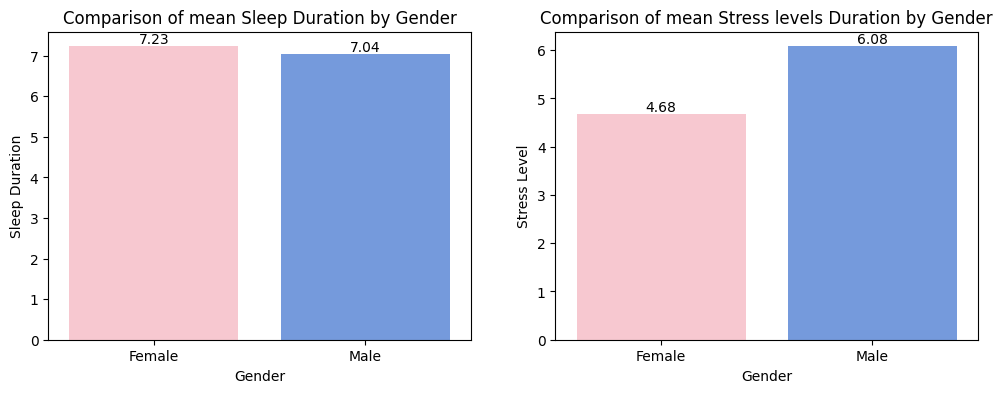

In [137]:
import seaborn as sns

# gender_stress_df, gender_duration_df

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first bar plot
ax1 = sns.barplot(x='Gender', y='Sleep Duration', data=gender_duration_df, ax=axs[0], hue='Gender', palette={'Female': 'pink', 'Male': 'cornflowerblue'})
# Add count labels to the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
axs[0].set_title('Comparison of mean Sleep Duration by Gender')

# Plot the second bar plot
ax2 = sns.barplot(x='Gender', y='Stress Level', data=gender_stress_df, ax=axs[1], hue='Gender', palette={'Female': 'pink', 'Male': 'cornflowerblue'})
# Add count labels to the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
axs[1].set_title('Comparison of mean Stress levels Duration by Gender')

plt.show()

Gender Distribution of occupation by Gender

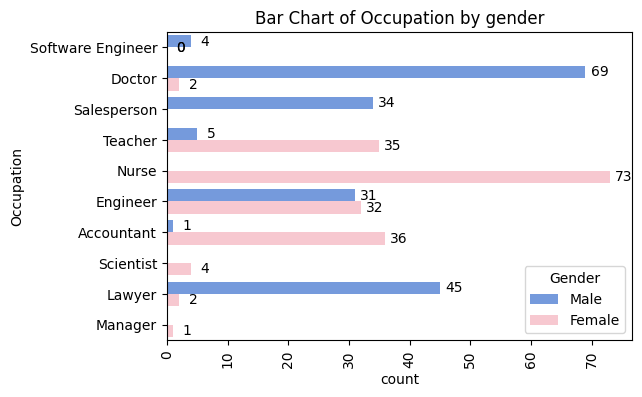

In [139]:
plt.figure(figsize=(6, 4))
# Create a countplot with x-axis labels vertical
ax = sns.countplot(y='Occupation', data=raw_data, orient='V', hue='Gender', palette={'Female': 'pink', 'Male': 'cornflowerblue'})
# Add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'center', va = 'center',
                xytext = (10, 0),
                textcoords = 'offset points')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.title('Bar Chart of Occupation by gender')
plt.show()

Is there a difference in daily steps between different occupations?

<ipython-input-144-b5336ca125d2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y='Occupation', x='Daily Steps', data=raw_data_sorted ,palette="husl")


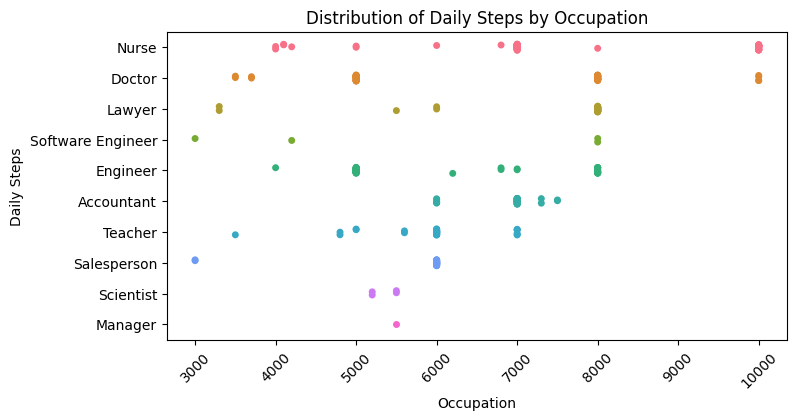

In [144]:
raw_data_sorted=raw_data.copy()
raw_data_sorted = raw_data_sorted.sort_values(by='Daily Steps', ascending=False)

plt.figure(figsize=(8,4))
sns.stripplot(y='Occupation', x='Daily Steps', data=raw_data_sorted ,palette="husl")
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Daily Steps')
plt.title('Distribution of Daily Steps by Occupation')
plt.show()

As expected, the occupation with more steps are: nurse and doctor
The occupation with less step is the manager and scientist

How are the BMI Category distributed by Occupation?

In [145]:
raw_data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

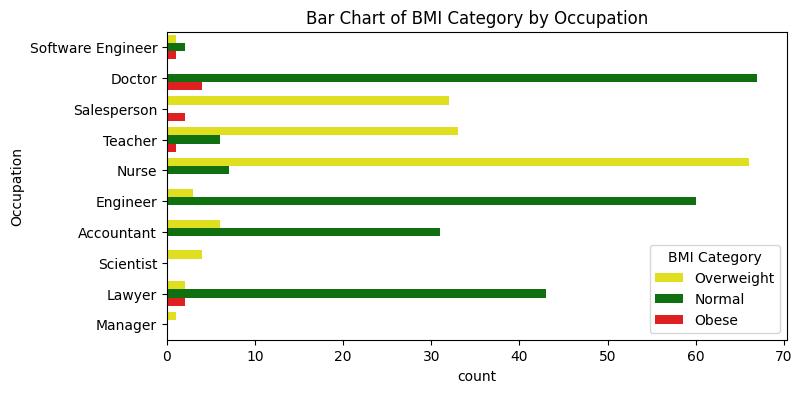

In [148]:
plt.figure(figsize=(8, 4))

ax = sns.countplot(y='Occupation', data=raw_data, orient='V', hue='BMI Category', palette={'Overweight': 'yellow', 'Normal': 'green','Obese':'red' })
plt.title("Bar Chart of BMI Category by Occupation")
# plt.xlabel("Occupation")
# plt.ylabel("Count")
# plt.xticks(rotation=90)
plt.legend(title="BMI Category")
plt.show()

So the occupation with more obesity is the Doctor

Are people with higher daily steps more likely to have a healthy BMI category?

<ipython-input-150-7514b4a46a03>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_steps_by_bmi, x='BMI Category', y='Daily Steps', palette='rocket')


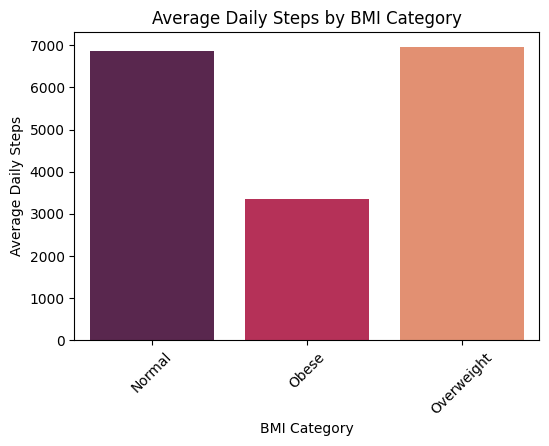

In [150]:
average_steps_by_bmi = raw_data.groupby('BMI Category')['Daily Steps'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=average_steps_by_bmi, x='BMI Category', y='Daily Steps', palette='rocket')
plt.xlabel('BMI Category')
plt.ylabel('Average Daily Steps')
plt.title('Average Daily Steps by BMI Category')
plt.xticks(rotation=45)
plt.show()

So people with daily steps lower have BMI obese.

Visualization of occupation and quality sleep

<ipython-input-191-8be118447bd4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y='Occupation', x='Quality of Sleep', data=mean_occupation_quality_sorted, ax=axs[0],palette='Set2')
<ipython-input-191-8be118447bd4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y='Occupation', x='Sleep Duration', data=mean_occupation_duration_sorted, ax=axs[1],palette='Set2')
<ipython-input-191-8be118447bd4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(y='Occupation', x='Stress Level', data=mean_occupation_stress_sorted, ax=axs[2]

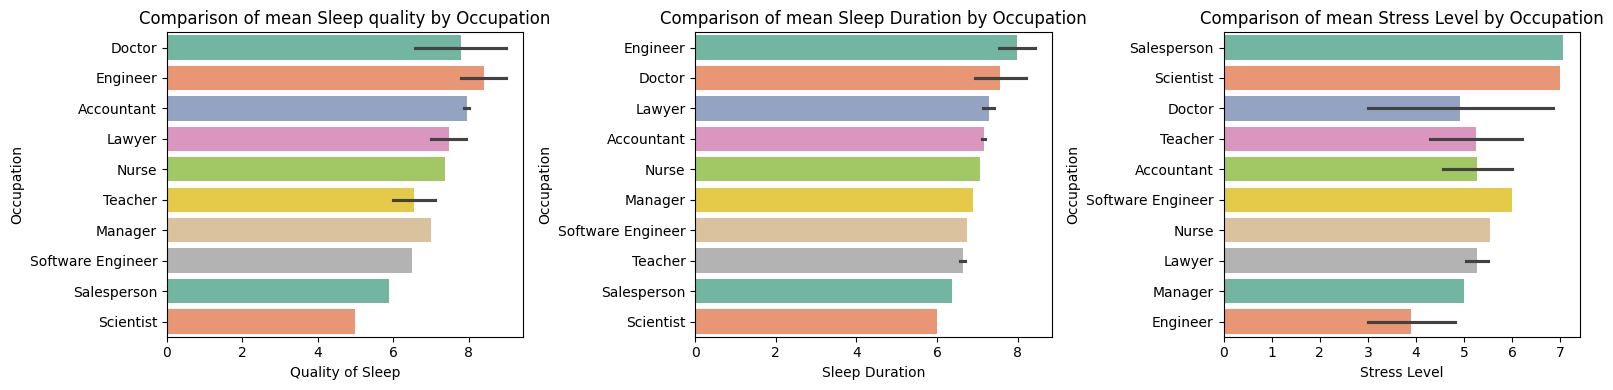

In [191]:
mean_occupation_quality = raw_data.groupby(['Occupation', 'Gender'])['Quality of Sleep'].mean().reset_index()
mean_occupation_duration = raw_data.groupby(['Occupation', 'Gender'])['Sleep Duration'].mean().reset_index()
mean_occupation_stress = raw_data.groupby(['Occupation', 'Gender'])['Stress Level'].mean().reset_index()

mean_occupation_quality_sorted = mean_occupation_quality.sort_values(by='Quality of Sleep', ascending=False)
mean_occupation_duration_sorted = mean_occupation_duration.sort_values(by='Sleep Duration', ascending=False)
mean_occupation_stress_sorted = mean_occupation_stress.sort_values(by='Stress Level', ascending=False)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Plot the first bar plot
ax1 = sns.barplot(y='Occupation', x='Quality of Sleep', data=mean_occupation_quality_sorted, ax=axs[0],palette='Set2')
axs[0].set_title('Comparison of mean Sleep quality by Occupation')

# Plot the second bar plot
ax2 = sns.barplot(y='Occupation', x='Sleep Duration', data=mean_occupation_duration_sorted, ax=axs[1],palette='Set2')
axs[1].set_title('Comparison of mean Sleep Duration by Occupation')

# Plot the second bar plot
ax3 = sns.barplot(y='Occupation', x='Stress Level', data=mean_occupation_stress_sorted, ax=axs[2],palette='Set2')
axs[2].set_title('Comparison of mean Stress Level by Occupation')

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

Scientists have the lowest average quality of sleep, followed by salespersons. At a glance, those who work in sales also appear to have lower sleep durations and higher stress levels.

The Sales Person and scientist have the stress level higher.

Correlation

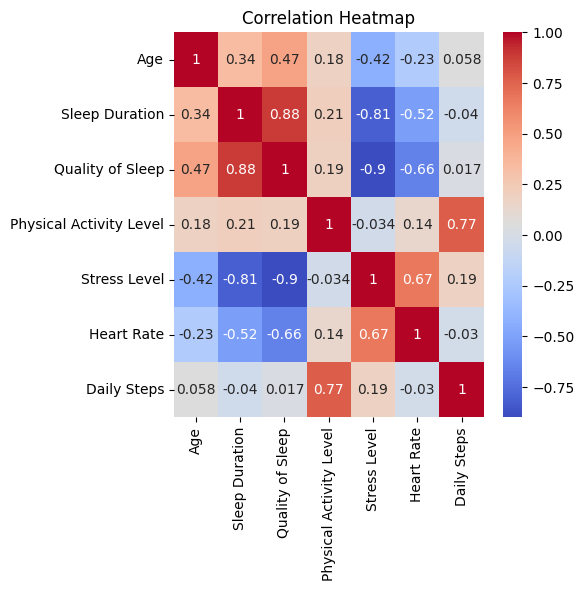

In [209]:
selected_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
new_df = raw_data[selected_columns]

correlation_matrix = new_df.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


the features more correlated are Sleep duration and quality sleep with 0.88 of correlation

# Create Linear Regression Model

In [205]:
#Create a linear regression model to predict quality of sleep
from sklearn.linear_model import LinearRegression

# Define the response variable and predictors
X = raw_data[['Sleep Duration', 'Stress Level', 'Heart Rate']] #predictors
y = raw_data['Quality of Sleep'] # target

model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)

Coefficients: [ 0.69333281 -0.29661064 -0.03681626]


In [206]:
#Create a linear regression model to predict sleep duration
from sklearn.linear_model import LinearRegression

# Define the response variable and predictors
X = raw_data[['Stress Level', 'Heart Rate']]
y = raw_data['Sleep Duration']

model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)

Coefficients: [-0.37833747  0.00940953]


# Summary

The linear regression models provide more details about how much our correlated features impact sleep quality. We have the following conclusions:

1- The attributes most correlated with **sleep quality** are *sleep duration, stress level, and heart rate*. More specifically:

 - For each extra hour of sleep (up to 8.5 hours), quality of sleep *improves* by about 7%
 - For each 1 point increase in stress level (on a scale of 1-10), quality of sleep *decreases* by about 3%
 - For each 1 point increase in average heart rate, quality of sleep *decreases* by about .4%

2- Clearly **sleep duration** is important for improving **sleep quality**. So the factors that impact sleep duration are:

 - For each 1 point increase in stress level, sleep duration *decreases* by about .4 hrs (24 minutes)
 - For each 1 point increase in average heart rate sleep duration *increases* by .009 hrs, or approximately .5 minutes

3- In terms of occupation, scientists and salespersons had the lowest quality of sleep ratings, while engineers had the highest.

https://github.com/NikoSeino/Python-Projects/blob/main/sleep-quality-analysis.ipynb

https://www.kaggle.com/code/ishavsaraf/full-analysis-and-eda-of-sleep-disorder